<a href="https://colab.research.google.com/github/ash-01xor/Exploratory-Data-Analysis/blob/main/PimaIndians_DiabetesDatabase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#import os
#os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Kaggle_Datasets/"

In [ ]:
#!kaggle datasets download -d uciml/pima-indians-diabetes-database

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 6.16MB/s]


In [ ]:
#!unzip pima-indians-diabetes-database.zip

Archive:  pima-indians-diabetes-database.zip
  inflating: diabetes.csv            


# Pima Indians Diabetes Database 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# loading the dataset
df = pd.read_csv("/content/gdrive/MyDrive/Kaggle_Datasets/diabetes.csv")
# viewing the first 5 rows of the dataframe
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.iloc[:20] #printing the first 20 rows of the dataset to get a preview of the values present

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### Basic EDA and Statistical Analysis

In [ ]:
# prints information about a DataFrame including the index dtype and columns, non-null values and memory usage
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Inference:**

1.   The data has not included any time or object
2.   The data doesnt consist of any null values



Dataframe.describe() - Generates descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. 

The statistics generated by the describe() method:

*   count -  tells the no of NoN empty rows of the feature
*   mean - tells the mean value of the feature
*   std  - gives the standard deviation of the feature
*   min - gives the minimum value of the feature
*   25%, 50%, 75% - represents the quartile information helpful for detecting the outliers 
*   max - gives the maximum value of the feature







In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


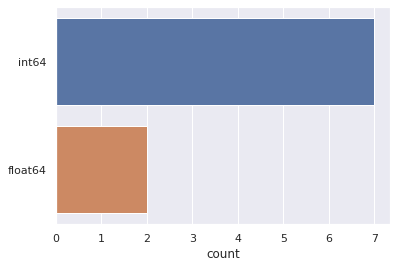

In [ ]:
# getting to know the type of data present
sns.countplot(y=df.dtypes,data=df)
plt.xlabel = ("Count of each data type")
plt.ylabel = ("Data Types") 
plt.show()

There are lots of values in the dataset in certain columns where the values entered has been 0 , it would be better for us to replace the '0' with Nan , so that we would be able to replace them with much more suitable values.



1.   Glucose
2.   Blood Pressure
3.   Skin Thickness
4.   Insulin
5.   BMI





In [ ]:
df_copy = df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

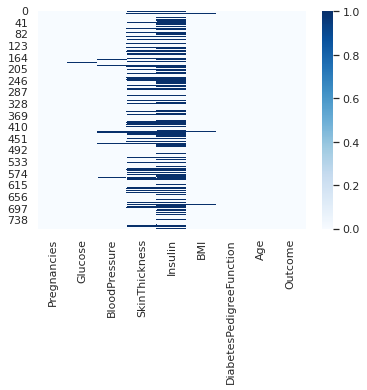

In [ ]:
sns.heatmap(df_copy.isnull(),cmap='Blues')

**Understanding the data distribution:**

Null values can be replaced in various ways however we need to have a better understanding of our data , inorder to replace them appropriately

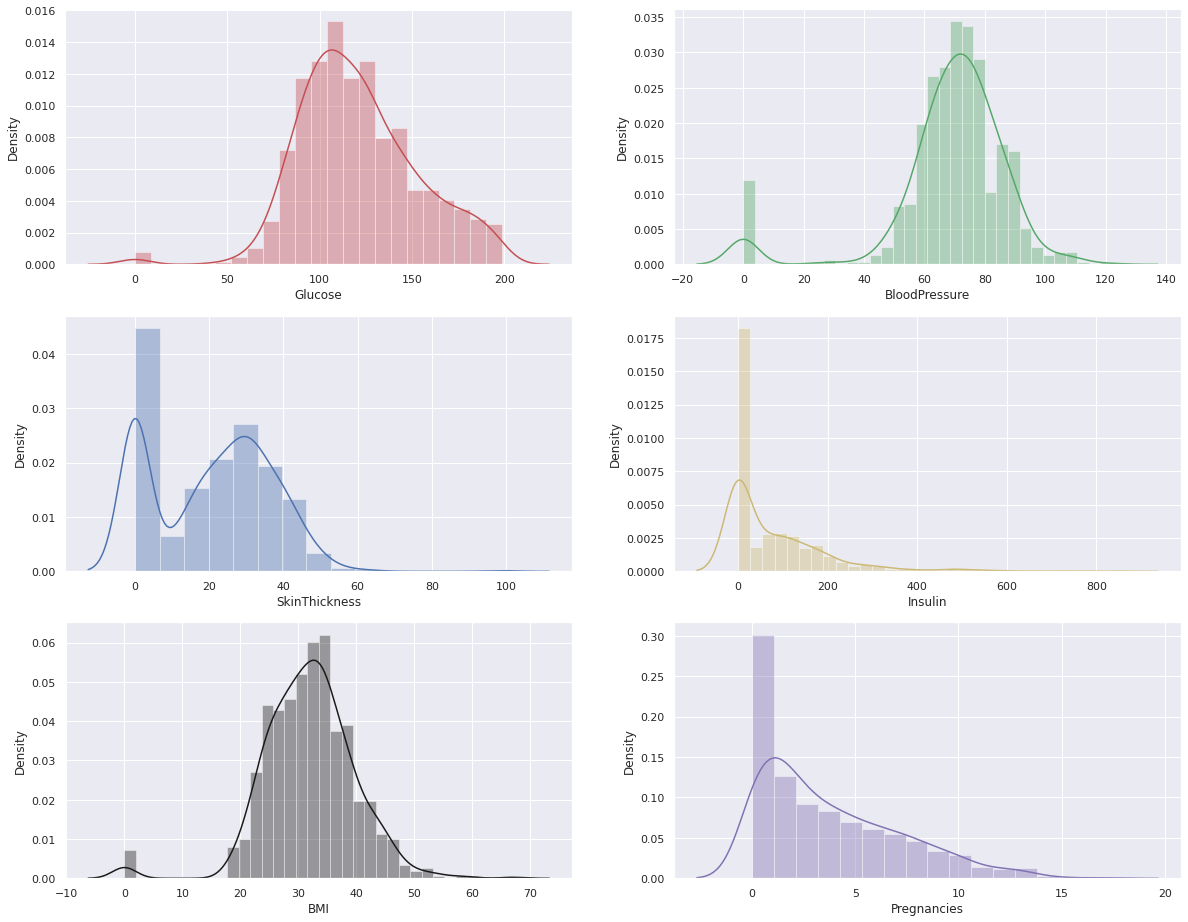

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(20,16))
Glucose= df['Glucose'].dropna()
sns.distplot(Glucose,color='r',ax=ax[0][0])

BloodPressure = df['BloodPressure'].dropna()
sns.distplot(BloodPressure,color='g',ax=ax[0][1])

SkinThickness = df['SkinThickness'].dropna()
sns.distplot(SkinThickness,color='b',ax=ax[1][0])

Insulin= df['Insulin'].dropna()
sns.distplot(Insulin,color='y',ax=ax[1][1])

BMI= df['BMI'].dropna()
sns.distplot(BMI,color='k',ax=ax[2][0])

Pregnancies = df['Pregnancies'].dropna()
sns.distplot(Pregnancies,color='m',ax=ax[2][1])


Imputing the NaN values for columns in accordance to their distribution:

In [ ]:
df_copy["Glucose"].fillna(df_copy["Glucose"].mean(),inplace=True) 
df_copy["BloodPressure"].fillna(df_copy["BloodPressure"].mean(),inplace=True)
df_copy["SkinThickness"].fillna(df_copy["SkinThickness"].median(),inplace=True) # since the distribution is skewed and consists of outliers we are replacing with median
df_copy["Insulin"].fillna(df_copy["Insulin"].median(),inplace=True)
df_copy["BMI"].fillna(df_copy["BMI"].median(),inplace=True)

**Plotting the Distribution after imputation of the missing values:**

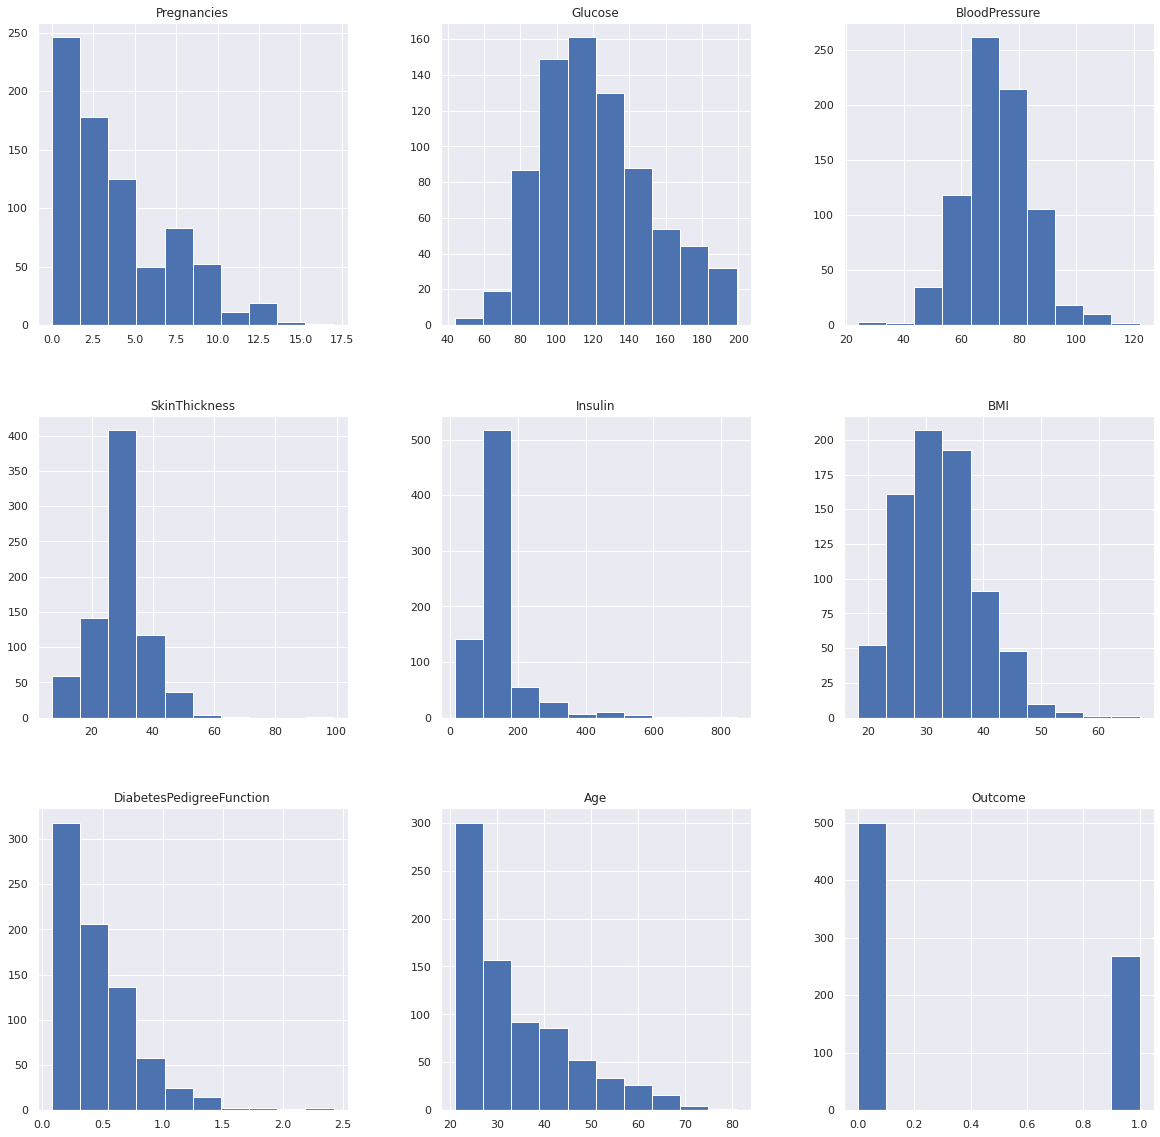

In [ ]:
data_dist = df_copy.hist(figsize=(20,20))

In [ ]:
df_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df["Age"].value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: Age, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c7276b1d0>],
      dtype=object)

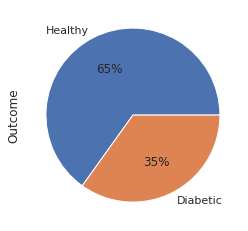

In [ ]:
labels=["Healthy","Diabetic"]
df["Outcome"].value_counts().plot(kind="pie",labels=labels,subplots=True,autopct="%1.0f%%")

We would get a better understanding of the Outcome if we get to plot it

0    500
1    268
Name: Outcome, dtype: int64


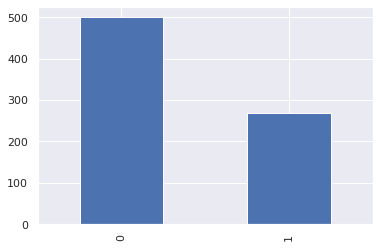

In [ ]:
preg =  df.Outcome.value_counts().plot(kind="bar")
print(df.Outcome.value_counts())

Here we get to see that data is biased towards having an outcome of 0 , the number of non diabetics is almost twice the number of diabetics patient

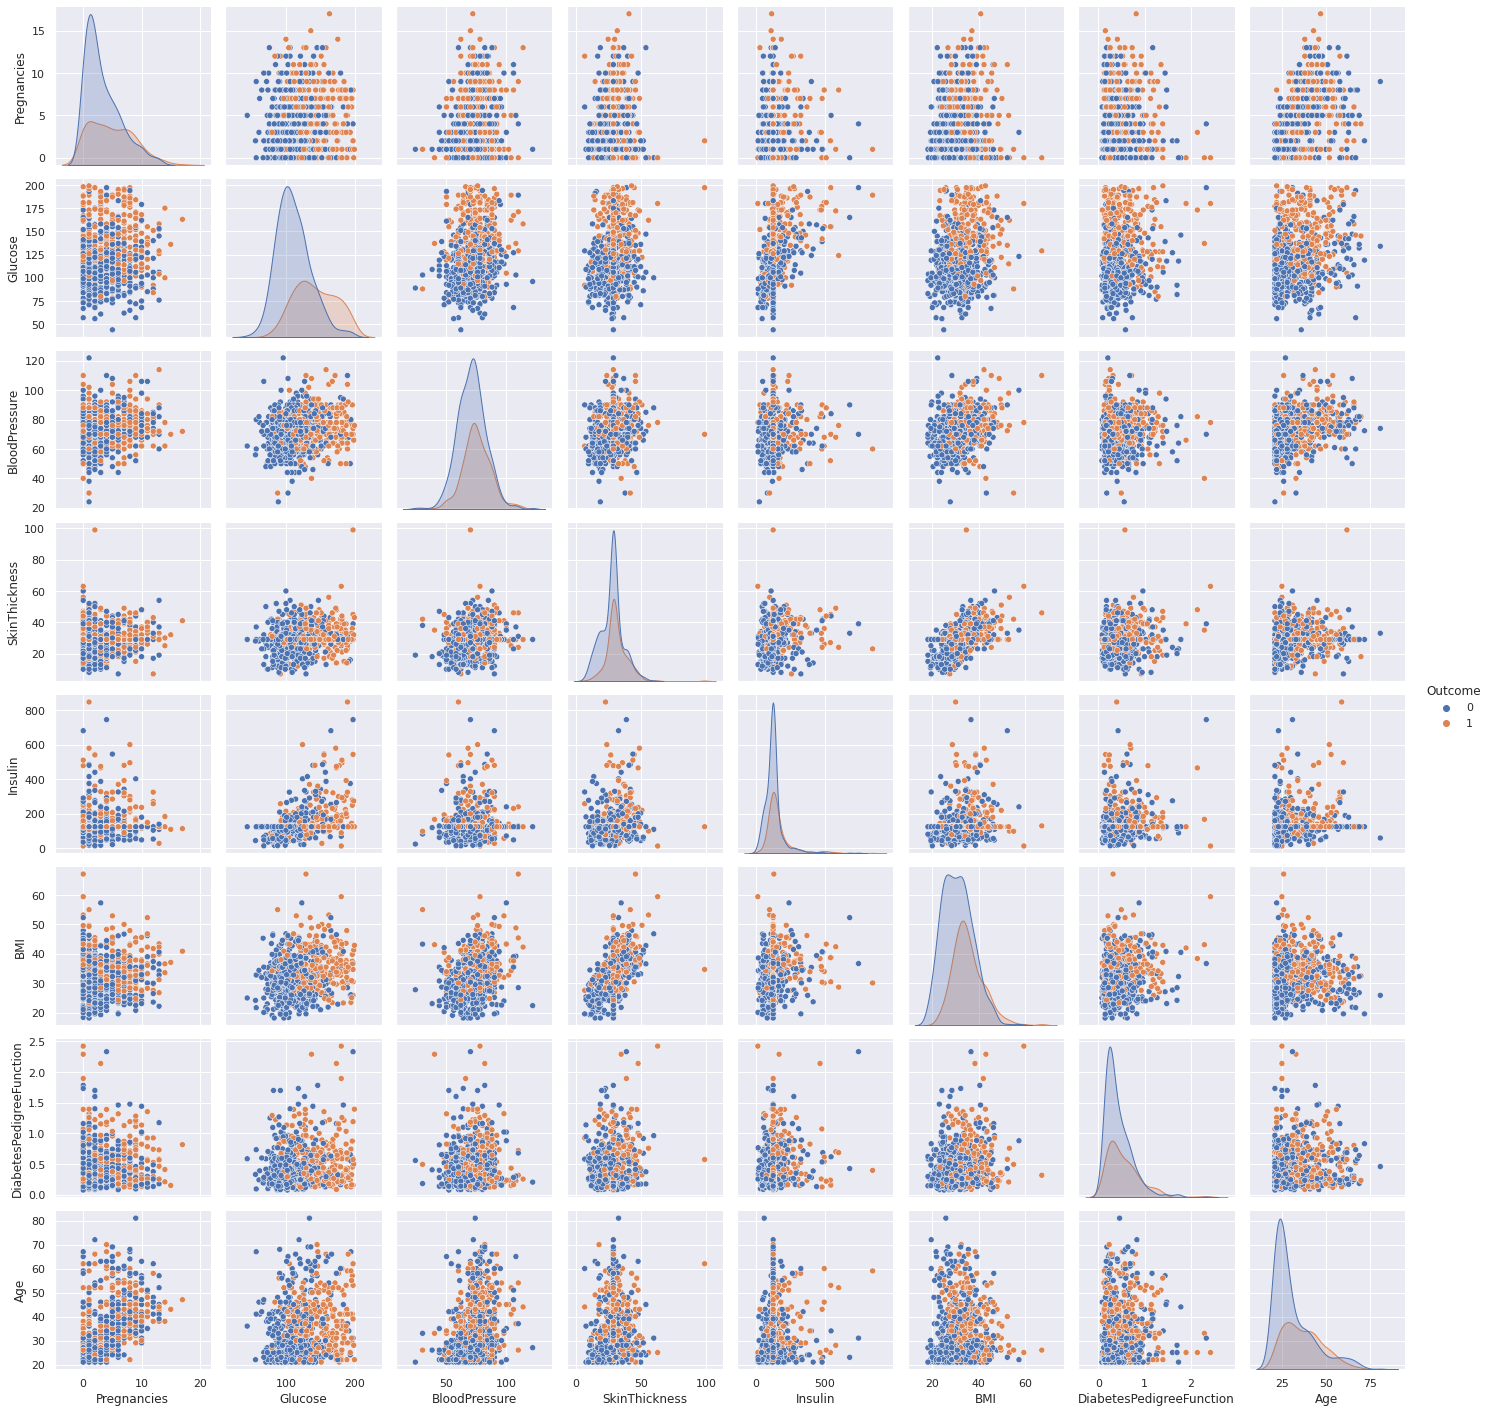

In [ ]:
p = sns.pairplot(df_copy,hue="Outcome")

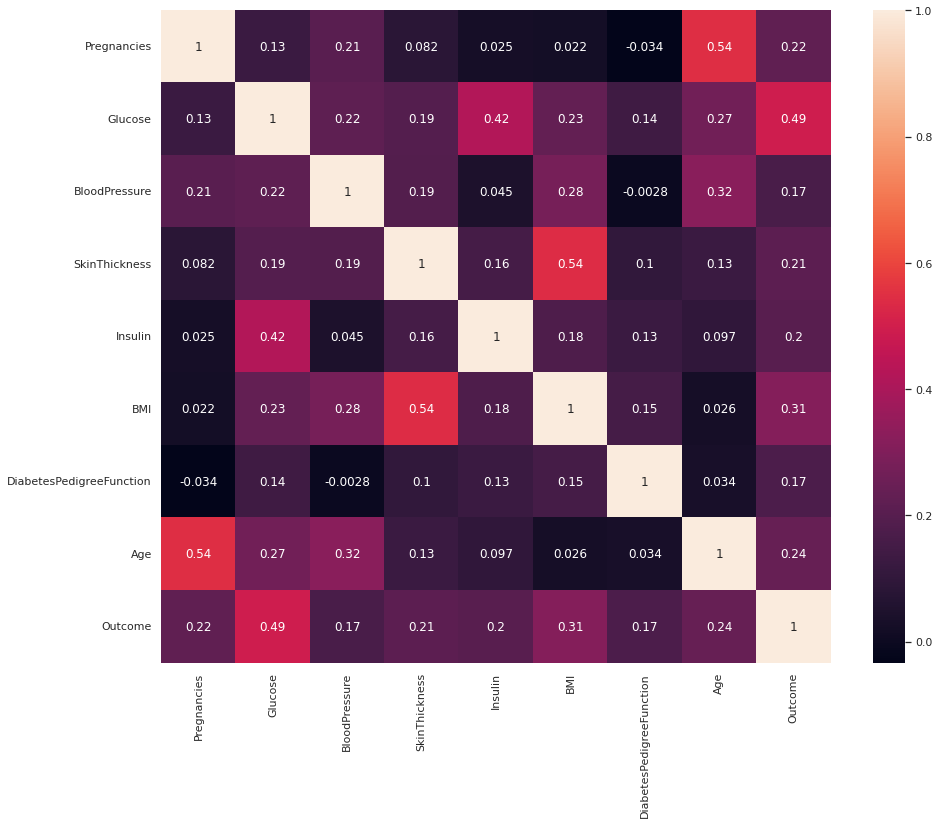

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(df_copy.corr(),annot=True)

### Scaling the Data

Bringing all the features to the same scale before applying the Algorithm

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [ ]:
# the first 8 columns consists of the feature and the last column consists of the target variables.
X = df.drop('Outcome',axis=1).values
y = df_copy.Outcome

Splitting the dataset into testing and training:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=42,stratify=y)

### Creating a Classifier using KNN algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

test_acc=[]
train_acc=[]

for i in range(1,15):
  knn = KNeighborsClassifier(i) #setting up a knn classifier
  knn.fit(X_train,y_train) #fitting the model
  # computing the accuracy for both the trainig and the test data
  train_acc.append(knn.score(X_train,y_train))
  test_acc.append(knn.score(X_test,y_test))

### **Visualisation of the Scores of the model:**

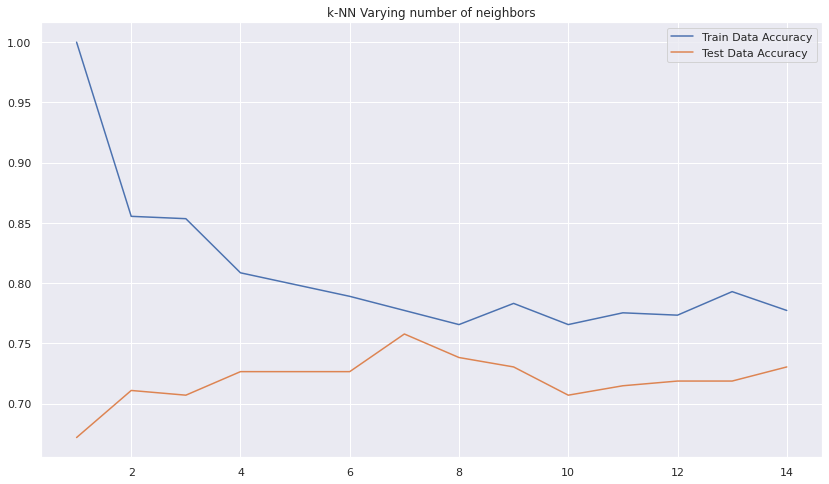

In [ ]:
plt.figure(figsize=(14,8))
plt.title('k-NN Varying number of neighbors')
sns.lineplot(range(1,15),train_acc,label='Train Data Accuracy')
sns.lineplot(range(1,15),test_acc,label='Test Data Accuracy')

*   From the given plot we get to observe that we get a maximum testing accuracy when K=7 , Hence create a KNN classifier for K=7 to get the score

In [ ]:
knn = KNeighborsClassifier(7)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7578125

### Model Performance Analysis

1.Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,146,21,167
1,48,41,89
All,194,62,256


Text(0.5, 12.5, 'Predicted label')

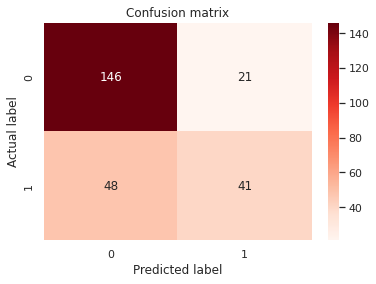

In [ ]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,cmap="Reds",fmt='g')
plt.title('Confusion matrix', y=1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

2.Classification Report

**Precision Score**:

    TP - True positive
    FP - False positive
  
*   accuracy of the positive predictions
*   precision  = TP/(TP+FP)

**Recall Score**:

    FN - False Negative


*  fraction of the positives correctly identified 
*  Recall = TP/(TP+FN)

**F1 Score**:


*   takes both precision and recall into account
*   F1 Score = 2(precision*recall)/(precision+recall)






In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       167
           1       0.66      0.46      0.54        89

    accuracy                           0.73       256
   macro avg       0.71      0.67      0.68       256
weighted avg       0.72      0.73      0.72       256



3.ROC Curve

In [ ]:
#ROC(receiver operating curve) tells us how good the model can distinguish between two things
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

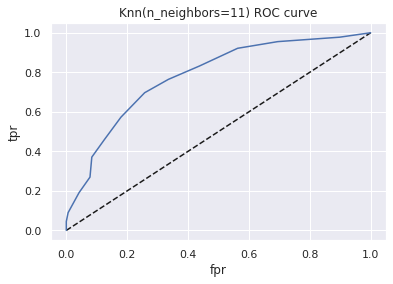

In [ ]:

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7795868936284733